In [1]:
%load_ext autoreload
%autoreload 2

# Data Structure: A Quick Look

In [2]:
import pandas as pd
from highlight_text import fig_text
from predicting_bike_usage.config import RAW_DATA_DIR
from predicting_bike_usage.visualization import visualize

2025-02-11 16:11:23.184 | INFO     | predicting_bike_usage.config:<module>:11 - PROJ_ROOT path is: /home/daniel/Projects/predicting-bike-usage


In [3]:
bike_df = pd.read_csv(RAW_DATA_DIR / "dataset.csv", index_col=0)

Today, rental bikes are popular in many urban cities for various reasons, including mobility, comfort, and being more environmentally friendly compared to other options. It is crucial to make this new option accessible to the public. To do so, it is necessary to understand when and where this kind of service is needed. For this reason, we have embarked on trying to understand some aspects using this dataset. In this dataset, we can see bike demand in Seoul and it contains variables related to weather, bike demand, dates, and local information such as holidays. This information can be helpful in understanding how demand behaves.

## Data Set Essentials

In [4]:
bike_df.head()

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  1/12/2017                254     0         -5.2        37         2.2   
1  1/12/2017                204     1         -5.5        38         0.8   
2  1/12/2017                173     2         -6.0        39         1.0   
3  1/12/2017                107     3         -6.2        40         0.9   
4  1/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

In [5]:
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
8755  30/11/2018               1003    19          4.2        34         2.6   
8756  30/11/2018                764    20          3.4        37         2.3   
8757  30/11/2018                694    21          2.6        39         0.3   
8758  30/11/2018                712    22          2.1        41         1.0   
8759  30/11/2018                584    23          1.9        43         1.3   

      Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

     Seasons     Holiday Functioning Day  
8755  Autumn  No Holiday             Yes  
8756  Autumn  No Holiday             Yes  
8757  Autumn  No Holiday             Yes  
8758  Autumn  No Holiday             Yes  
8759  Autumn  No Holiday             Yes

| Variable Name               | Type        | Description                                           | Units  |
|-----------------------------|-------------|-------------------------------------------------------|--------|
| Date                        | Date        | Date (year-month-day)                                | -      |
| Rented Bike Count           | Integer      | Count of bikes rented at each hour                   | -      |
| Hour                        | Integer      | Hour of the day                                      | -      |
| Temperature                  | Continuous   | Temperature in Celsius                               | °C     |
| Humidity                     | Integer      | Humidity percentage                                  | %      |
| Wind speed                   | Continuous   | Wind speed in meters per second                      | m/s    |
| Visibility                   | Integer      | Visibility in 10 meters                              | 10m    |
| Dew point temperature        | Continuous   | Dew point temperature in Celsius                     | °C     |
| Solar Radiation             | Continuous   | Solar radiation in megajoules per square meter       | MJ/m²  |
| Rainfall                     | Integer      | Rainfall in millimeters                              | mm     |
| Snowfall                     | Integer      | Snowfall in centimeters                              | cm     |
| Seasons                      | Categorical  | Season of the year (Winter, Spring, Summer, Autumn)  | -      |
| Holiday                      | Binary       | Whether it is a holiday or not (Holiday/No holiday)  | -      |
| Functioning Day              | Binary       | Whether the day is functioning or not (NoFunc/Func)  | -      |


In the variables, we can see mixed kinds of data in different units and types, such as binary, categorical, integer, continuous, and date. This is important because it leads us to perform necessary feature engineering to transform these variables into better and more manageable features.

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 1.0+ MB


We don't have any null values in our data set. The `Date` column is of object dtype, and the `Seasons`, `Holiday`, and `Functioning Day` columns are also of object dtype. Numerical values are represented as either integer or continuous types. The data set is relatively small, with a memory usage of only 1 MB.



In [7]:
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y')

## Understanding Data Distributions

In [8]:
numeric_features = [
    "Rented Bike Count",
    "Hour",
    "Temperature",
    "Humidity",
    "Wind speed",
    "Visibility",
    "Dew point temperature",
    "Solar Radiation",
    "Rainfall",
    "Snowfall",
]

In [9]:
bike_df[numeric_features].describe()

Rented Bike Count         Hour  Temperature     Humidity   Wind speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew point temperature  Solar Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall  
count  8760.000000  
mean      0.075068  
std       0.436746  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       8.800000

(<Figure size 4500x4500 with 10 Axes>,
 array([<Axes: title={'center': 'Distribution of Rented Bike Count'}>,
        <Axes: title={'center': 'Distribution of Hour'}>,
        <Axes: title={'center': 'Distribution of Temperature'}>,
        <Axes: title={'center': 'Distribution of Humidity'}>,
        <Axes: title={'center': 'Distribution of Wind speed'}>,
        <Axes: title={'center': 'Distribution of Visibility'}>,
        <Axes: title={'center': 'Distribution of Dew point temperature'}>,
        <Axes: title={'center': 'Distribution of Solar Radiation'}>,
        <Axes: title={'center': 'Distribution of Rainfall'}>,
        <Axes: title={'center': 'Distribution of Snowfall'}>], dtype=object))

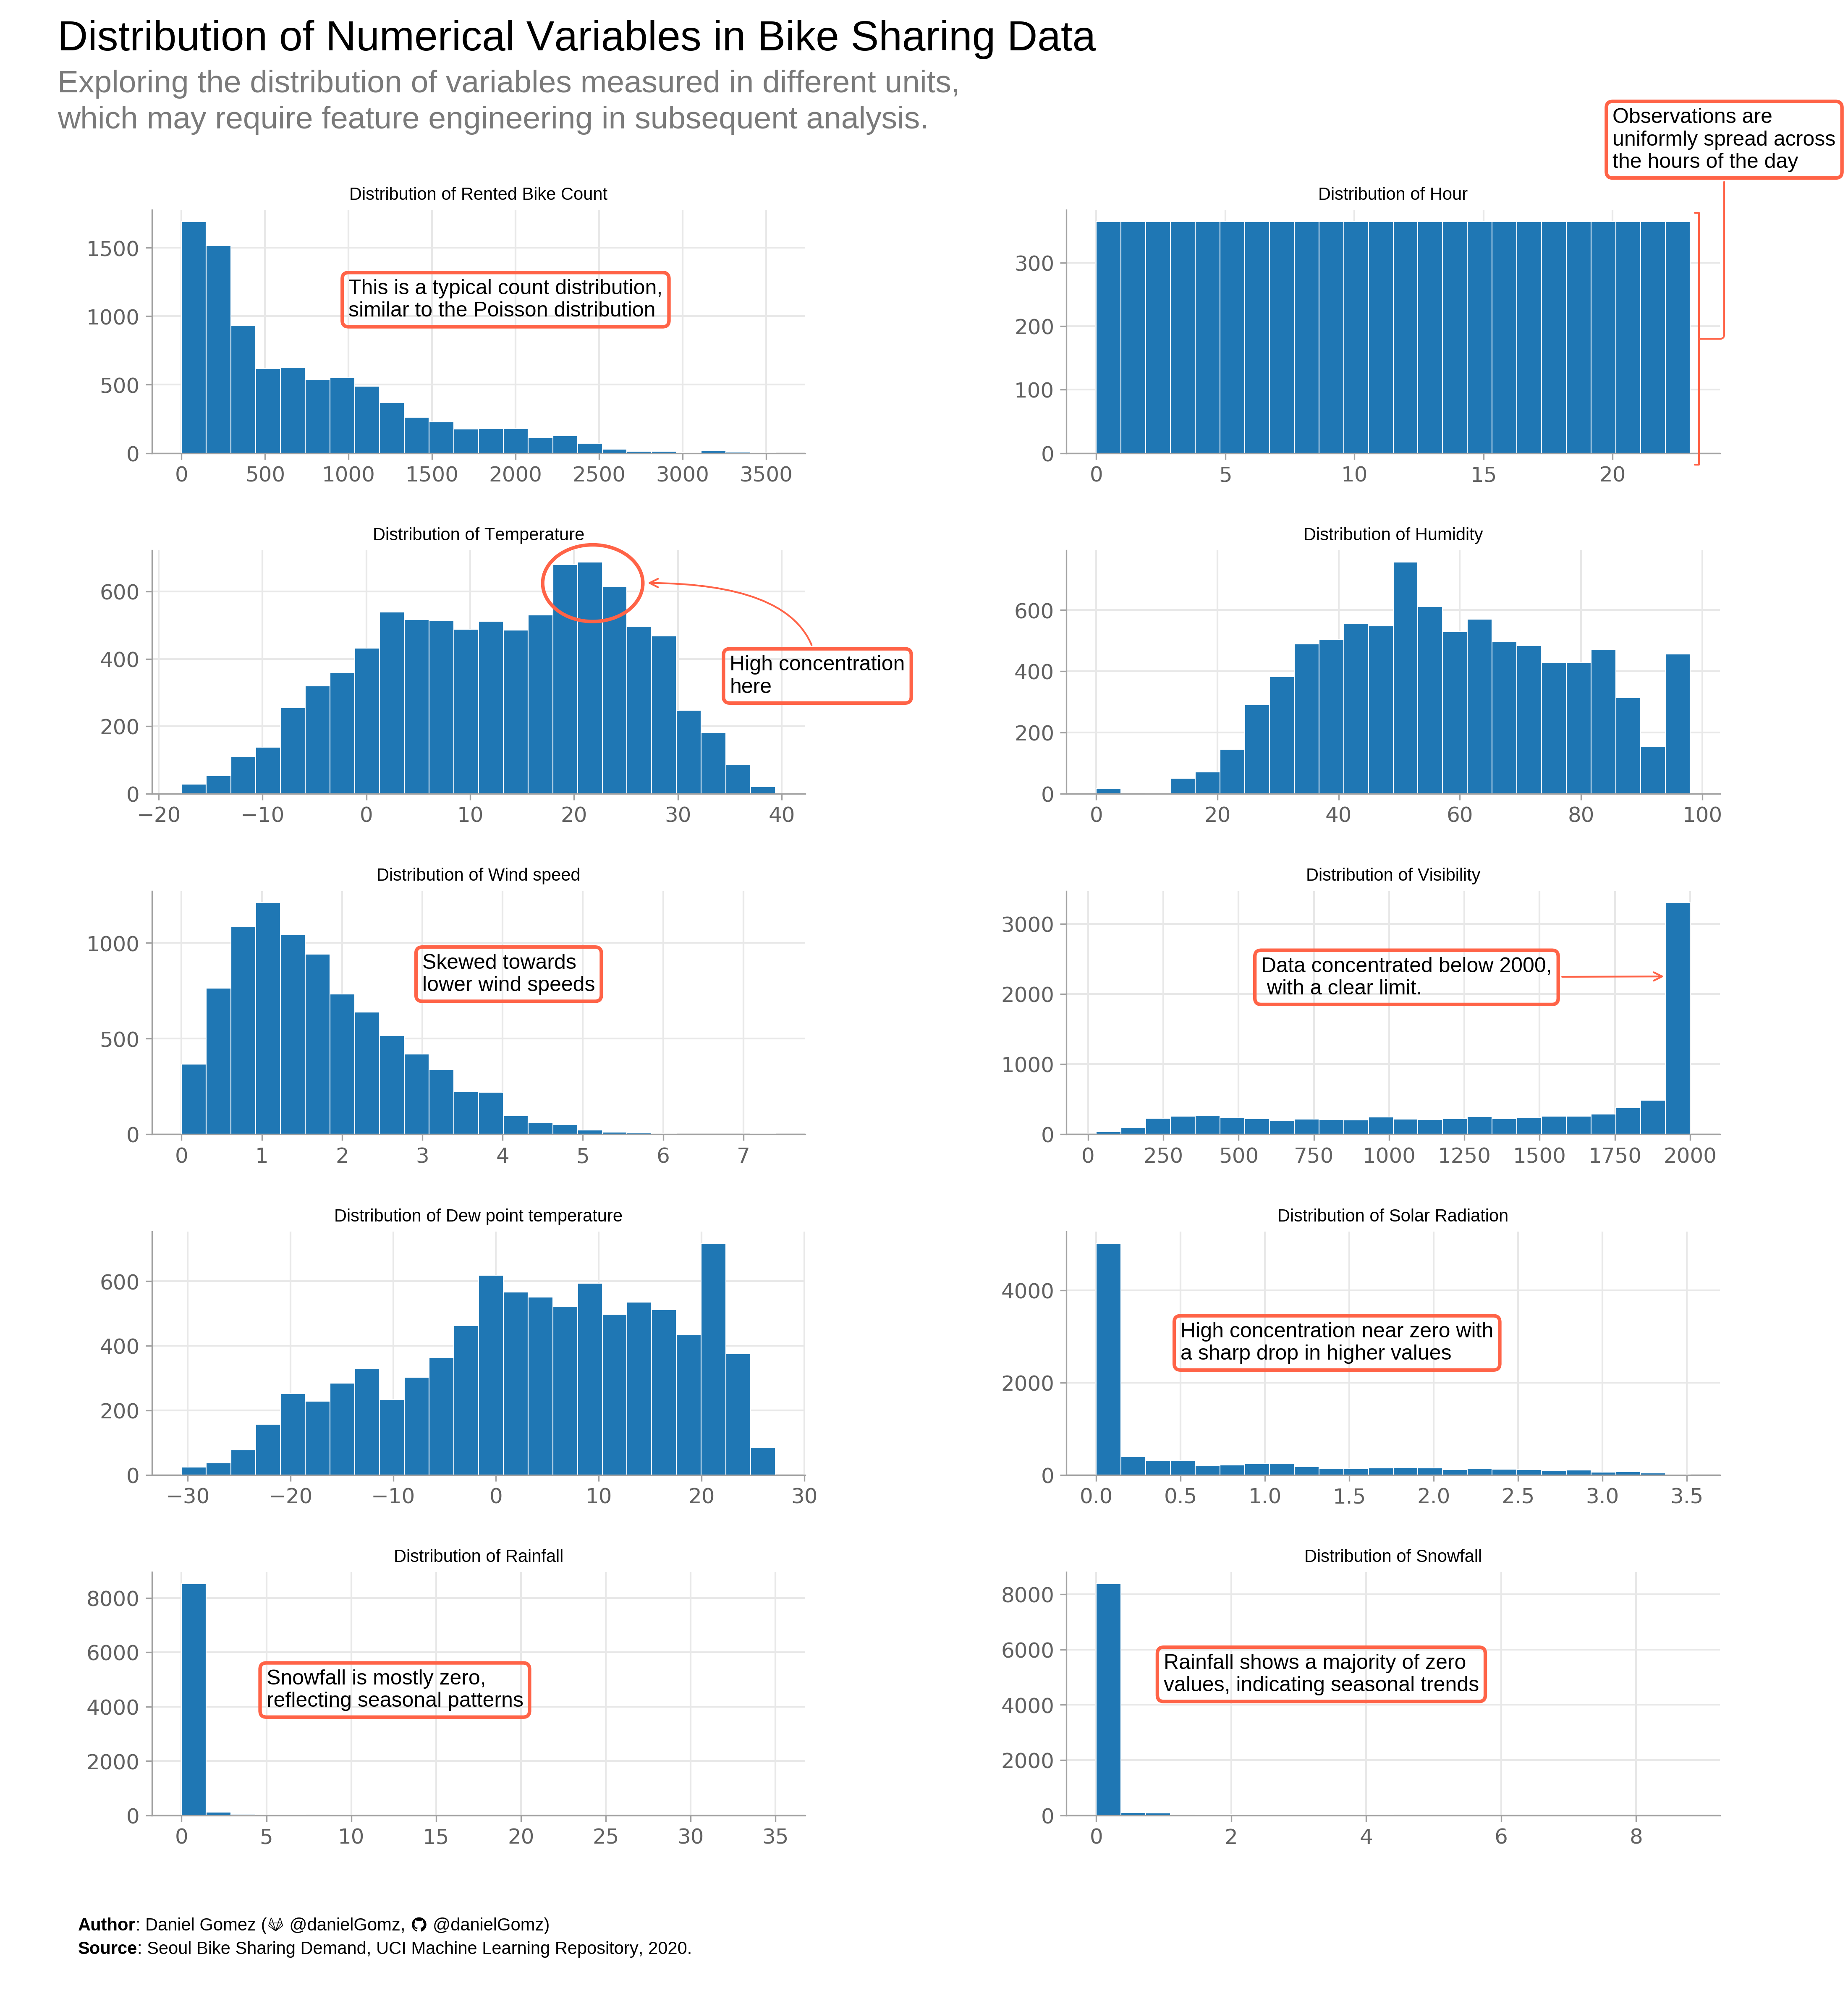

In [10]:
visualize.continuous_features(
    dataset=bike_df,
    columns=numeric_features,
    title="Distribution of Numerical Variables in Bike Sharing Data",
    subtitle="Exploring the distribution of variables measured in different units,\nwhich may require feature engineering in subsequent analysis.",
    n_columns=2,
    figsize=(15, 15),
    annotations=[
        {
            "text": "This is a typical count distribution,\nsimilar to the Poisson distribution",
            "xy": (1000, 1000),
            "target_axis": 0,
            "with_box": True,
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
        {
            "target_axis": 1,
            "text": "Observations are\nuniformly spread across\nthe hours of the day",
            "xy_text": (20, 450),
            "xy": (23.2, 180),
            "with_arrow": True,
            "arrow_style": {
                "arrowstyle": "-[,widthB=6.0",
                "color": "tomato",
                "connectionstyle": "angle,angleA=90,angleB=0,rad=10",
            },
            "with_box": True,
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
        {
            "target_axis": 2,
            "with_box": True,
            "text": "          \n ",
            "xy": (19, 575),
            "box_style": {
                "boxstyle": "ellipse",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
        {
            "target_axis": 2,
            "with_box": True,
            "with_arrow": True,
            "text": "High concentration\nhere",
            "xy": (26.75, 625),
            "xy_text": (35, 300),
            "arrow_style": {
                "arrowstyle": "->",
                "color": "tomato",
                "connectionstyle": "angle3,angleA=90,angleB=0",
            },
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
        {
            "target_axis": 4,
            "text": "Skewed towards\nlower wind speeds",
            "xy": (3, 750),
            "with_box": True,
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
        {
            "target_axis": 5,
            "text": "Data concentrated below 2000,\n with a clear limit.",
            "xy_text": (575, 2000),
            "xy": (1925, 2250),
            "with_arrow": True,
            "arrow_style": {"arrowstyle": "->", "color": "tomato"},
            "with_box": True,
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
        {
            "target_axis": 7,
            "text": "High concentration near zero with\na sharp drop in higher values",
            "xy": (0.5, 2500),
            "with_box": True,
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
        {
            "target_axis": 8,
            "text": "Snowfall is mostly zero,\nreflecting seasonal patterns",
            "xy": (5, 4000),
            "with_box": True,
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
        {
            "target_axis": 9,
            "text": "Rainfall shows a majority of zero\nvalues, indicating seasonal trends",
            "xy": (1, 4500),
            "with_box": True,
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
    ],
)

In [11]:
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']

In [12]:
bike_df[categorical_features].describe()

Seasons     Holiday Functioning Day
count     8760        8760            8760
unique       4           2               2
top     Spring  No Holiday             Yes
freq      2208        8328            8465

(<Figure size 4500x1200 with 3 Axes>,
 array([<Axes: title={'center': 'Distribution of Seasons'}, ylabel='Count'>,
        <Axes: title={'center': 'Distribution of Holiday'}, ylabel='Count'>,
        <Axes: title={'center': 'Distribution of Functioning Day'}, ylabel='Count'>],
       dtype=object))

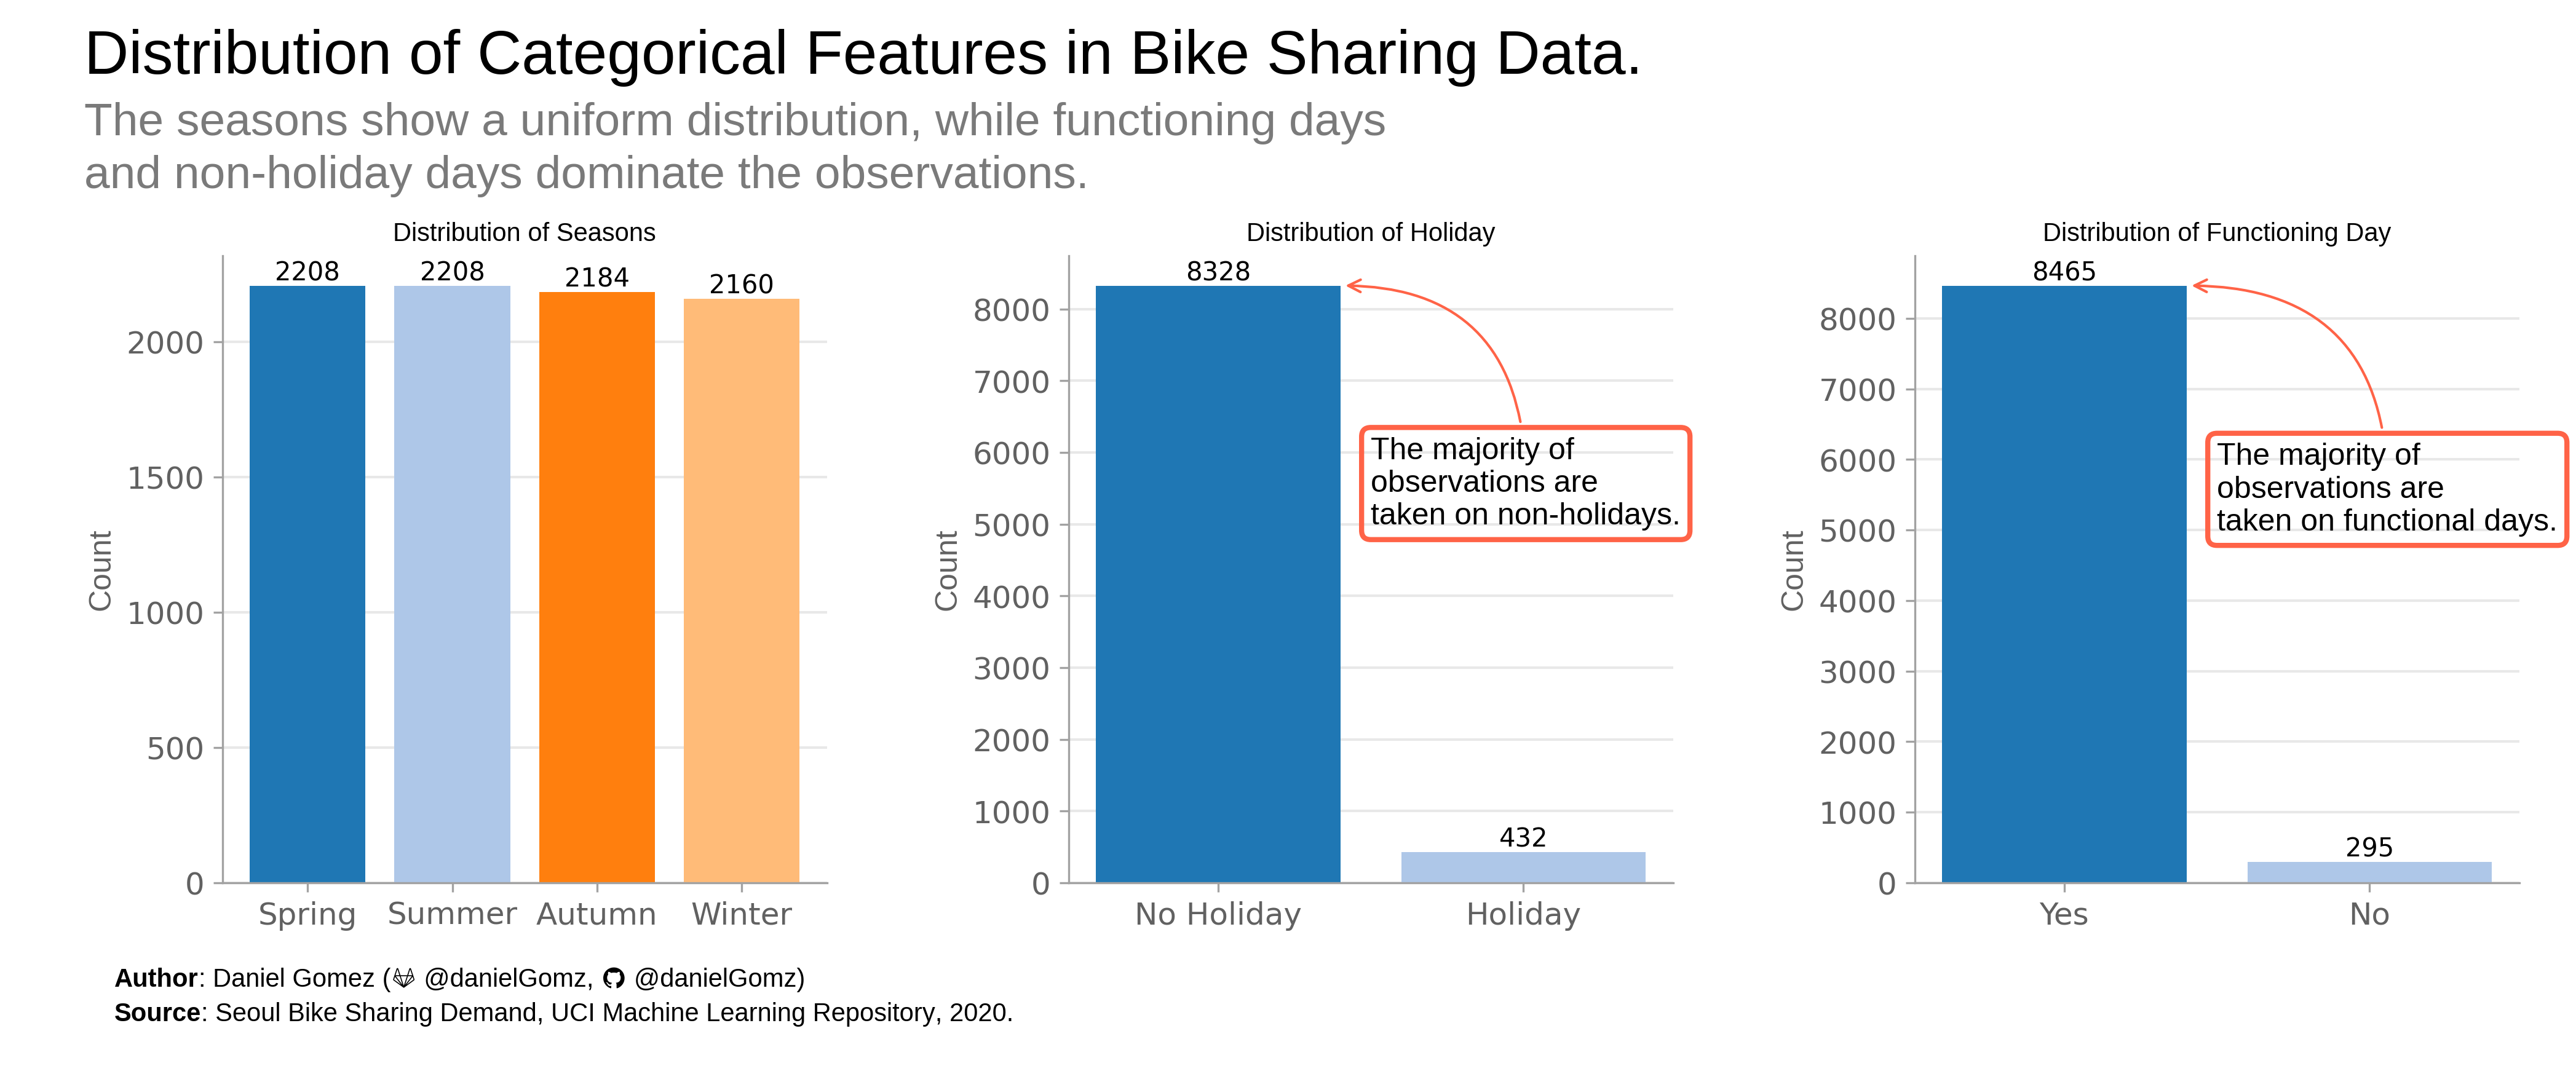

In [13]:
visualize.categorical_features(
    dataset=bike_df,
    columns=categorical_features,
    title="Distribution of Categorical Features in Bike Sharing Data.",
    subtitle="The seasons show a uniform distribution, while functioning days\nand non-holiday days dominate the observations.",
    n_columns=3,
    figsize=(15, 4),
    show_count=True,
    annotations=[
        {
            "target_axis": 1,
            "text": "The majority of\nobservations are\ntaken on non-holidays.",
            "xy_text": (0.5, 5000),
            "with_arrow": True,
            "xy": (0.40, 8328),
            "arrow_style": {
                "arrowstyle": "->",
                "color": "tomato",
                "connectionstyle": "angle3,angleA=90,angleB=0",
            },
            "with_box": True,
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
        {
            "target_axis": 2,
            "text": "The majority of\nobservations are\ntaken on functional days.",
            "xy_text": (0.5, 5000),
            "with_arrow": True,
            "xy": (0.40, 8465),
            "arrow_style": {
                "arrowstyle": "->",
                "color": "tomato",
                "connectionstyle": "angle3,angleA=90,angleB=0",
            },
            "with_box": True,
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        },
    ],
)

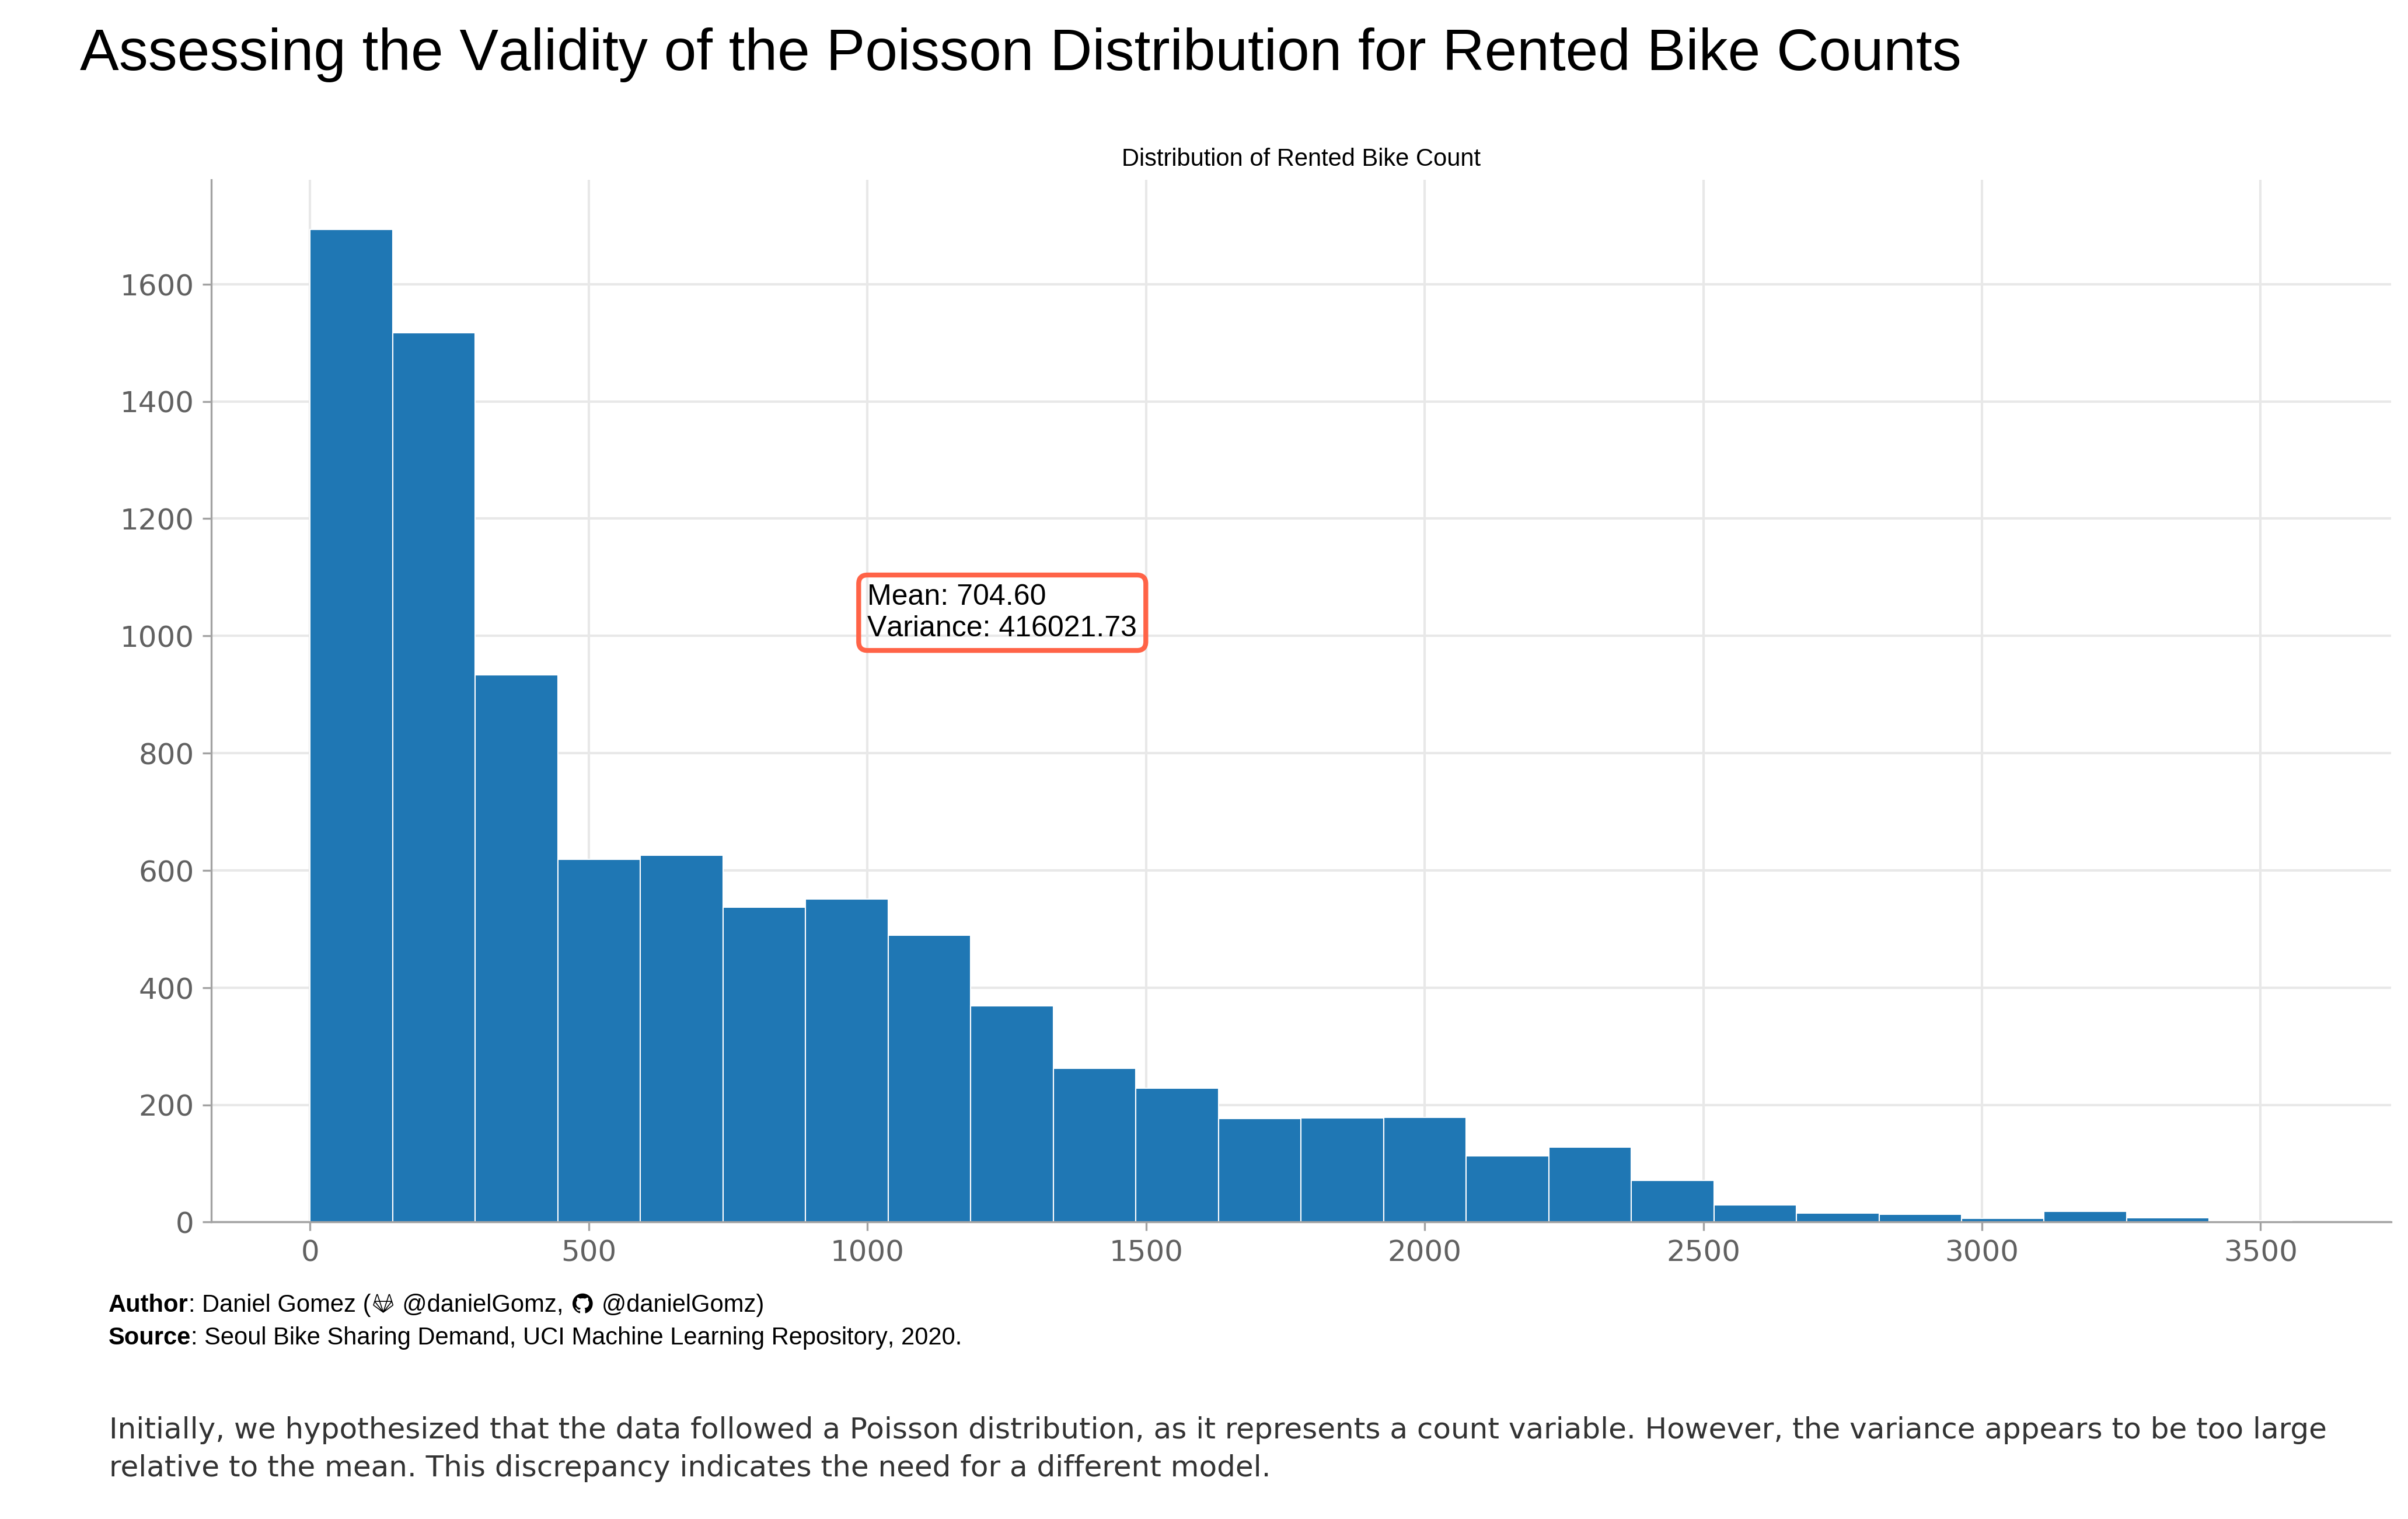

In [14]:
visualize.continuous_features(
    dataset=bike_df,
    columns=["Rented Bike Count"],
    title="Assessing the Validity of the Poisson Distribution for Rented Bike Counts",
    n_columns=1,
    figsize=(15, 7),
    annotations=[
        {
            "text": f"Mean: {bike_df['Rented Bike Count'].mean():.2f}\nVariance: {bike_df['Rented Bike Count'].var():.2f}",
            "xy": (1000, 1000),
            "target_axis": 0,
            "with_box": True,
            "box_style": {
                "boxstyle": "round",
                "facecolor": "none",
                "edgecolor": "tomato",
                "linewidth": 2,
            },
        }
    ],
)

fig_text(
    s="""Initially, we hypothesized that the data followed a Poisson distribution, as it represents a count variable. However, the variance appears to be too large
relative to the mean. This discrepancy indicates the need for a different model.
""",
    x=0.03125,
    y=-0.12,
    fontsize="12",
    color="#333333",
    ha="left",
    va="bottom",
)